In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rcParams
rcParams["font.size"] = 15

In [2]:
imputed = pd.read_csv("scors_knn_imp.csv").drop(columns="Unnamed: 0")
zeros = pd.read_csv("scors_zeros_imp.csv").drop(columns="Unnamed: 0")

In [3]:
# imputed = pd.read_csv("scors_knn_imp_pca.csv").drop(columns="Unnamed: 0")
# zeros = pd.read_csv("scors_zeros_imp_pca.csv").drop(columns="Unnamed: 0")

In [4]:
imputed["desc"] = "knn_imputed"
zeros["desc"] = "zeros"

In [5]:
dat = pd.concat([imputed, zeros])
dat

,algorithm,balanced_accuracy,f1 score,desc
0,Baseline,0.415650,0.243902,knn_imputed
1,Baseline,0.466049,0.292683,knn_imputed
2,Baseline,0.508218,0.320988,knn_imputed
3,Baseline,0.424708,0.246914,knn_imputed
4,Baseline,0.591729,0.395062,knn_imputed
...,...,...,...,...
35,Light GBM,0.768801,0.618182,zeros
36,Light GBM,0.802469,0.711111,zeros
37,Light GBM,0.811241,0.711111,zeros
38,Light GBM,0.730382,0.600000,zeros


In [6]:
dat = dat.melt(id_vars=["algorithm", "desc"], var_name="scoring")

In [7]:
dat

,algorithm,desc,scoring,value
0,Baseline,knn_imputed,balanced_accuracy,0.415650
1,Baseline,knn_imputed,balanced_accuracy,0.466049
2,Baseline,knn_imputed,balanced_accuracy,0.508218
3,Baseline,knn_imputed,balanced_accuracy,0.424708
4,Baseline,knn_imputed,balanced_accuracy,0.591729
...,...,...,...,...
155,Light GBM,zeros,f1 score,0.618182
156,Light GBM,zeros,f1 score,0.711111
157,Light GBM,zeros,f1 score,0.711111
158,Light GBM,zeros,f1 score,0.600000


In [8]:
iqr_mean = dat.groupby(by=["desc","algorithm","scoring"]).apply(lambda x: np.percentile(x, [75, 50, 25]).sum()/3)


In [9]:
iqr_mean

desc         algorithm            scoring          
knn_imputed  Baseline             balanced_accuracy    0.466325
                                  f1 score             0.286861
             Gradient Boosting    balanced_accuracy    0.773021
                                  f1 score             0.639505
             KNN                  balanced_accuracy    0.735253
                                  f1 score             0.554094
             Light GBM            balanced_accuracy    0.759132
                                  f1 score             0.624243
             Logistic Regression  balanced_accuracy    0.779877
                                  f1 score             0.614078
             Random Forest        balanced_accuracy    0.757062
                                  f1 score             0.607224
             SVC                  balanced_accuracy    0.765274
                                  f1 score             0.625751
             XGBoost              balanced_accuracy 

In [10]:
iqr_mean.loc[:,:,"f1 score"]

desc         algorithm          
knn_imputed  Baseline               0.286861
             Gradient Boosting      0.639505
             KNN                    0.554094
             Light GBM              0.624243
             Logistic Regression    0.614078
             Random Forest          0.607224
             SVC                    0.625751
             XGBoost                0.607891
zeros        Baseline               0.286861
             Gradient Boosting      0.632130
             KNN                    0.499835
             Light GBM              0.643098
             Logistic Regression    0.623268
             Random Forest          0.638000
             SVC                    0.527018
             XGBoost                0.605987
dtype: float64

In [11]:
means = iqr_mean[~iqr_mean.index.get_level_values(1).str.contains("Baseline")]

In [12]:
means2 = means.reset_index()
means2.columns = list(means2.columns)[:-1] + ["value"]
means2

,desc,algorithm,scoring,value
0,knn_imputed,Gradient Boosting,balanced_accuracy,0.773021
1,knn_imputed,Gradient Boosting,f1 score,0.639505
2,knn_imputed,KNN,balanced_accuracy,0.735253
3,knn_imputed,KNN,f1 score,0.554094
4,knn_imputed,Light GBM,balanced_accuracy,0.759132
5,knn_imputed,Light GBM,f1 score,0.624243
6,knn_imputed,Logistic Regression,balanced_accuracy,0.779877
7,knn_imputed,Logistic Regression,f1 score,0.614078
8,knn_imputed,Random Forest,balanced_accuracy,0.757062
9,knn_imputed,Random Forest,f1 score,0.607224


In [13]:
meanz = dat.groupby(["algorithm", "desc","scoring"]).mean()
meanz

value
algorithm           desc        scoring                    
Baseline            knn_imputed balanced_accuracy  0.481271
                                f1 score           0.299910
                    zeros       balanced_accuracy  0.481271
                                f1 score           0.299910
Gradient Boosting   knn_imputed balanced_accuracy  0.758407
                                f1 score           0.624735
                    zeros       balanced_accuracy  0.745347
                                f1 score           0.604531
KNN                 knn_imputed balanced_accuracy  0.743149
                                f1 score           0.558097
                    zeros       balanced_accuracy  0.707465
                                f1 score           0.515203
Light GBM           knn_imputed balanced_accuracy  0.761883
                                f1 score           0.635657
                    zeros       balanced_accuracy  0.743787
                                f1 score           0.600808
Logistic Regression knn_imputed balanced_accuracy  0.781871
                                f1 score           0.615272
                    zeros       balanced_accuracy  0.787287
                                f1 score           0.624306
Random Forest       knn_imputed balanced_accuracy  0.755507
                                f1 score           0.609859
                    zeros       balanced_accuracy  0.764453
                                f1 score           0.633130
SVC                 knn_imputed balanced_accuracy  0.754764
                                f1 score           0.605880
                    zeros       balanced_accuracy  0.696124
                                f1 score           0.531288
XGBoost             knn_imputed balanced_accuracy  0.755262
                                f1 score           0.622561
                    zeros       balanced_accuracy  0.750371
                                f1 score           0.614276

In [14]:
meanz[meanz["value"] == meanz["value"].max()]

,,,value
algorithm,desc,scoring,
Logistic Regression,zeros,balanced_accuracy,0.787287


In [24]:
cols = list(dat["algorithm"].unique()[1:])

In [16]:
# nohgbc = dat[~(dat["algorithm"]=="HGBC")]
# nohgbc = nohgbc[~(nohgbc["algorithm"]=="Baseline")]
nohgbc = means2
dat = dat[~(dat["algorithm"]=="Baseline")]

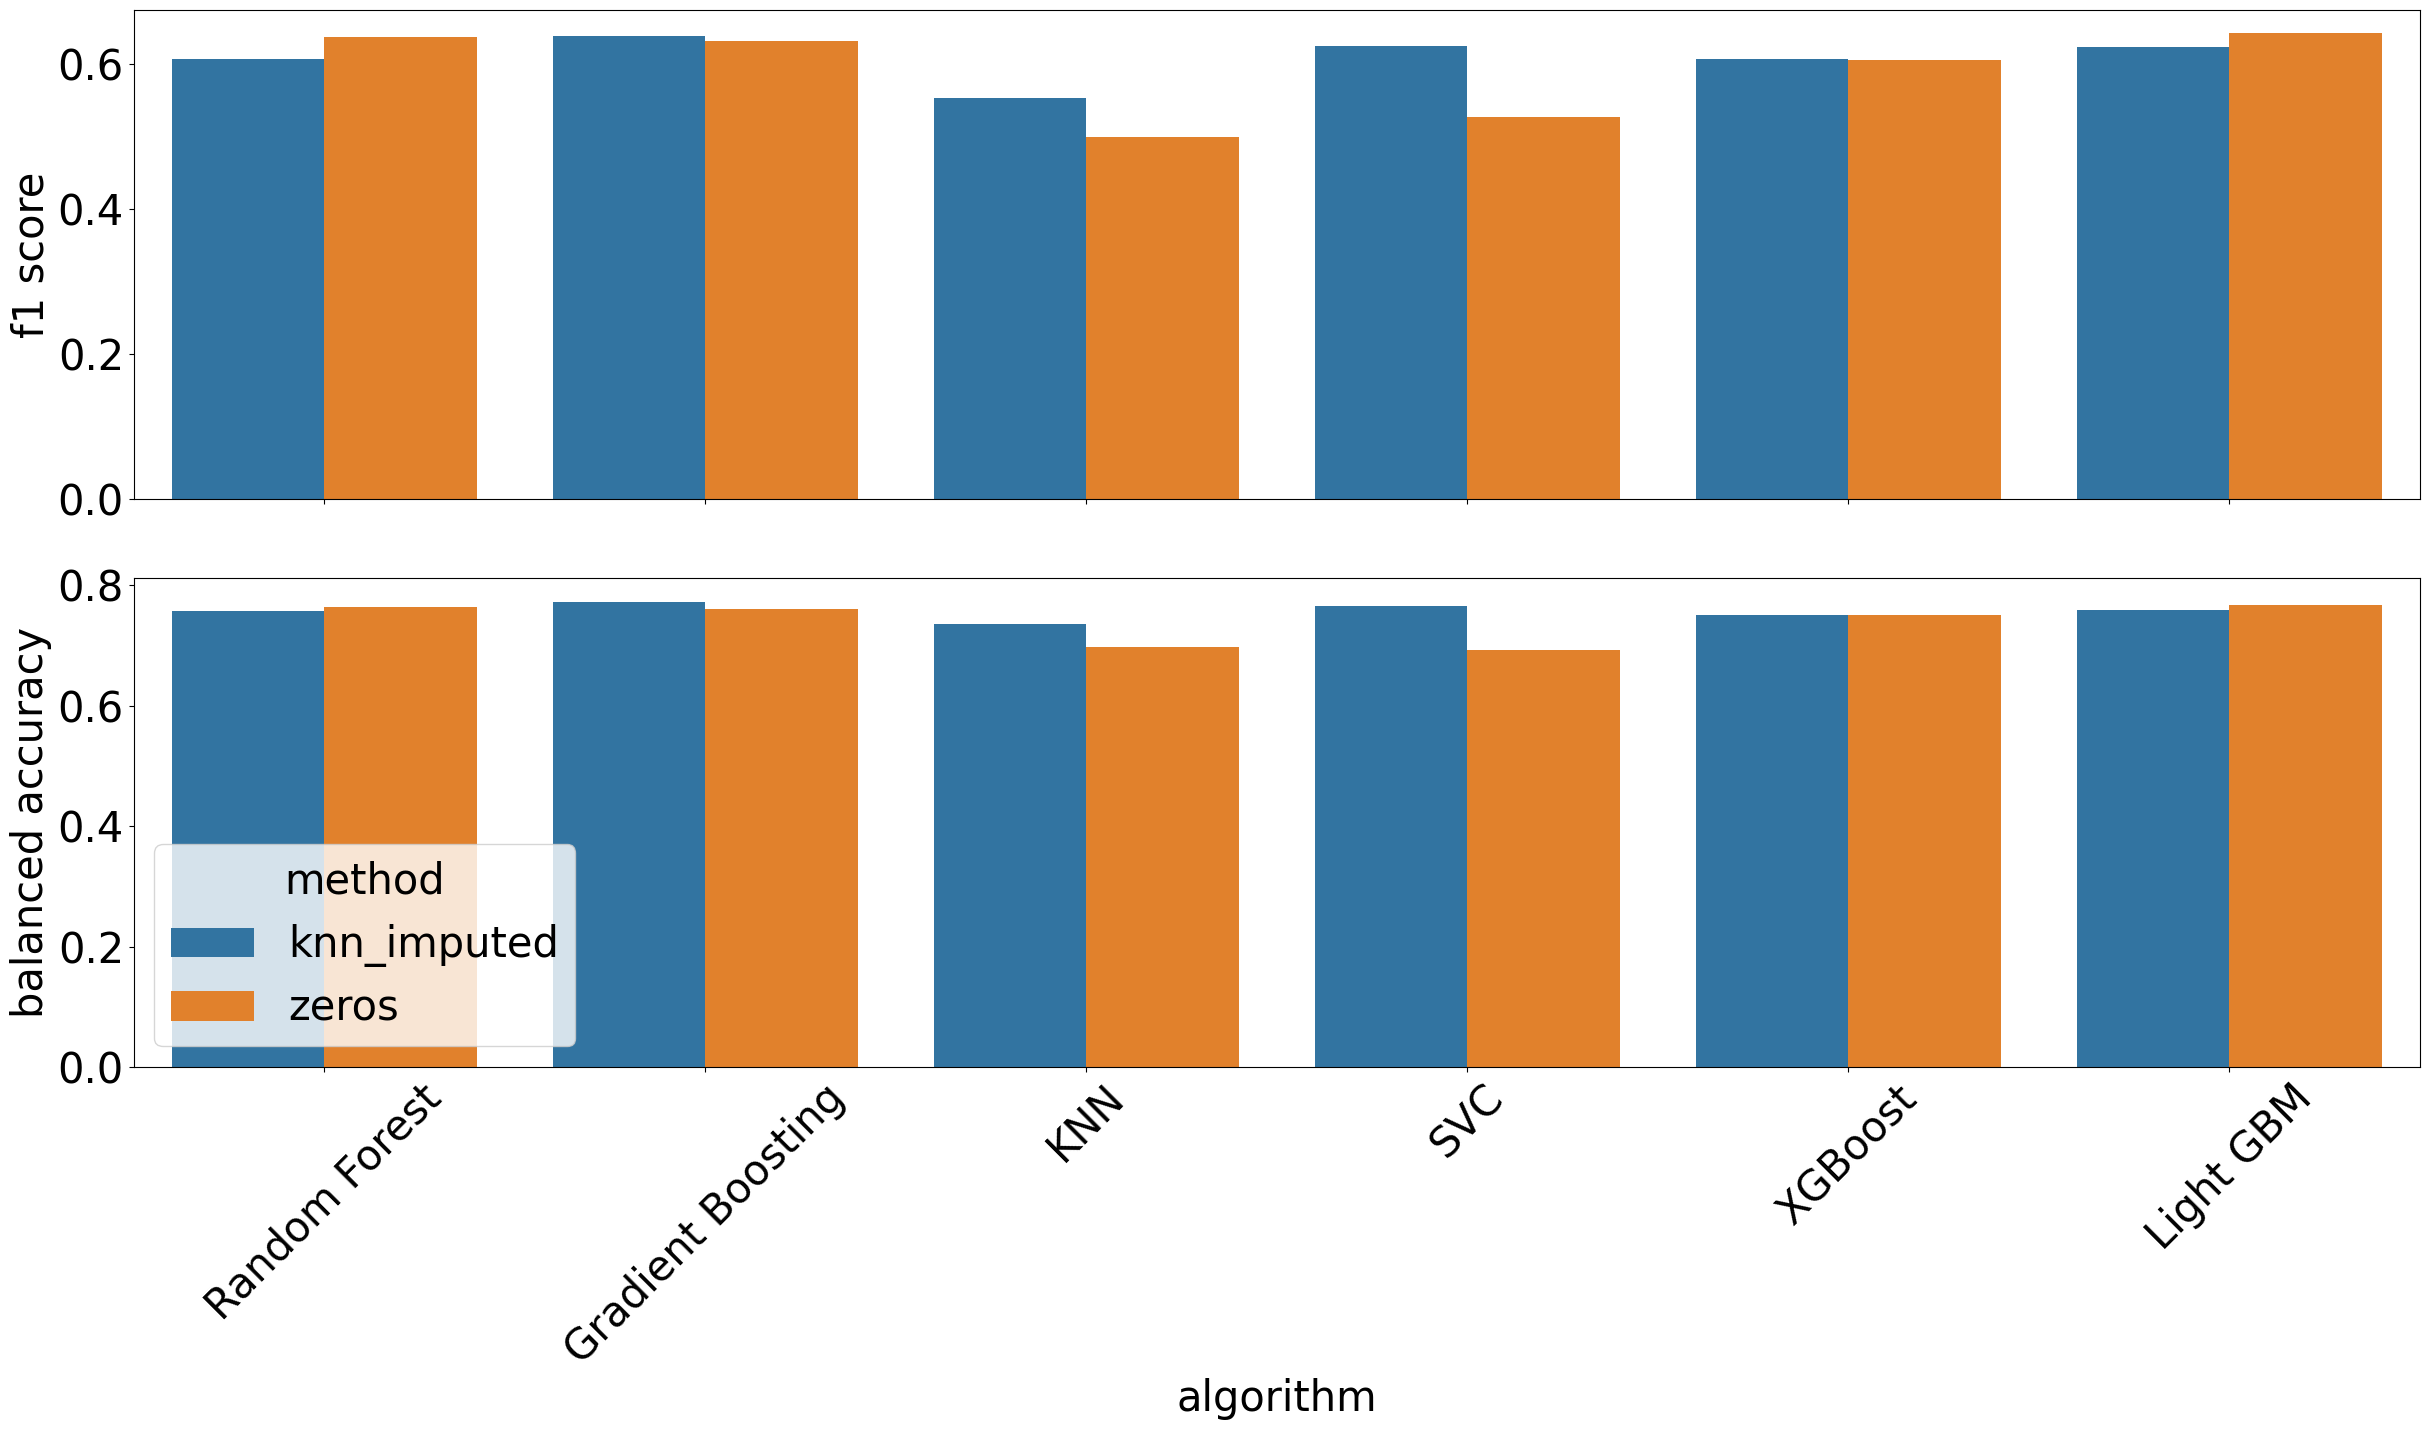

In [27]:
plt.rcParams["font.size"] = "30"
fig, ax = plt.subplots(2,1, figsize=(25,15), sharex=True)
sns.barplot(x="algorithm", y="value", hue="desc", data=nohgbc[nohgbc["scoring"]=="f1 score"], ax=ax[0], order=cols)
# sns.swarmplot(x="algorithm", y="value", hue="desc", dodge=True, data=dat[dat["scoring"]=="f1 score"], ax=ax[0], color="k")
ax[0].set(ylabel="f1 score", xlabel="")
ax[0].get_legend().remove()
sns.barplot(x="algorithm", y="value", hue="desc", data=nohgbc[nohgbc["scoring"]=="balanced_accuracy"], ax=ax[1], order=cols)
# sns.swarmplot(x="algorithm", y="value", hue="desc", dodge=True, data=dat[dat["scoring"]=="balanced_accuracy"], ax=ax[1], color="k")
ax[1].set(ylabel="balanced accuracy")
h, l = ax[1].get_legend_handles_labels()
l = ["KNN imputing", "filling with zeros"]


ax[1].legend(handles=[item for item in h[2:]], labels=l, loc="lower left")
leg = ax[1].get_legend()
leg.set_title("method")
ax[1].tick_params("x", rotation=45)
plt.tight_layout()

In [28]:
fig.savefig("missing_data_cv.pdf")